In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import datetime as dt
import math
import warnings
warnings.filterwarnings('ignore')

# Import load data from excel file (source = BGE)
data = pd.read_excel('Historical_Load_Data.xlsx', 
                     header = None, 
                     names = ['Segment', 'Date', 'Hour 1', 'Hour 2', 
                              'Hour 3', 'Hour 4', 'Hour 5', 'Hour 6', 
                              'Hour 7', 'Hour 8', 'Hour 9', 'Hour 10', 
                              'Hour 11', 'Hour 12', 'Hour 13', 
                              'Hour 14', 'Hour 15', 'Hour 16', 
                              'Hour 17', 'Hour 18', 'Hour 19', 
                              'Hour 20', 'Hour 21', 'Hour 22', 
                              'Hour 23', 'Hour 24'])

# Filter out incomplete entries
data.dropna(inplace = True)

# Convert dates to datetime
data['Date'] = pd.to_datetime(data['Date'])

In [2]:
# 8 BGE Schedules
G = data['Segment'] == 'Segment:G'
GF = data['Segment'] == 'Segment:GF'
GL = data['Segment'] == 'Segment:GL'
GS = data['Segment'] == 'Segment:GS'
R = data['Segment'] == 'Segment:R'
RH = data['Segment'] == 'Segment:RH'
RL = data['Segment'] == 'Segment:RL'
RLH = data['Segment'] == 'Segment:RLH'

In [3]:
# Load data by year
data_2007 = data['Date'].dt.year == 2007
data_2008 = data['Date'].dt.year == 2008
data_2009 = data['Date'].dt.year == 2009
data_2010 = data['Date'].dt.year == 2010
data_2011 = data['Date'].dt.year == 2011
data_2012 = data['Date'].dt.year == 2012
data_2013 = data['Date'].dt.year == 2013
data_2014 = data['Date'].dt.year == 2014
data_2015 = data['Date'].dt.year == 2015
data_2016 = data['Date'].dt.year == 2016
data_2017 = data['Date'].dt.year == 2017
data_2018 = data['Date'].dt.year == 2018

In [4]:
# Load data by month
data_january = data['Date'].dt.month == 1
data_february = data['Date'].dt.month == 2
data_march = data['Date'].dt.month == 3
data_april = data['Date'].dt.month == 4
data_may = data['Date'].dt.month == 5
data_june = data['Date'].dt.month == 6
data_july = data['Date'].dt.month == 7
data_august = data['Date'].dt.month == 8
data_september = data['Date'].dt.month == 9
data_october = data['Date'].dt.month == 10
data_november = data['Date'].dt.month == 11
data_december = data['Date'].dt.month == 12

In [5]:
# Train: [2007 2014]
train = data[data_2007 | data_2008 | data_2009 | data_2010 | 
             data_2011 | data_2012 | data_2013 | data_2014]

# Test: [2015 2018]
test = data[data_2015 | data_2016 | data_2017 | data_2018]

# Convert datetime to ordinal for model input
train['Date'] = data['Date'].map(dt.datetime.toordinal)
test['Date'] = data['Date'].map(dt.datetime.toordinal)

In [28]:
# Schedule G
train_G = train[G]
test_G = test[G]

X_train_G = train_G.drop('Segment', axis = 1)
Y_train_G = train_G.drop(['Segment', 'Date'], axis = 1)

X_test_G = test_G.drop('Segment', axis = 1)
Y_test_G = test_G.drop(['Segment', 'Date'], axis = 1)

regression_model = LinearRegression()

regression_model.fit(X_train_G, Y_train_G)
# print(regression_model.score(X_train_G, Y_train_G))

Y_predict_G = regression_model.predict(X_test_G)
mse_G = mean_squared_error(Y_predict_G, Y_test_G)
print('Mean Squared Error (G - no weather): ' + str(mse_G))

Mean Squared Error (G - no weather): 1.0905238862377888e-25


In [29]:
# Schedule GF
train_GF = train[GF]
test_GF = test[GF]

X_train_GF = train_GF.drop('Segment', axis = 1)
Y_train_GF = train_GF.drop(['Segment', 'Date'], axis = 1)

X_test_GF = test_GF.drop('Segment', axis = 1)
Y_test_GF = test_GF.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_GF, Y_train_GF)
# print(regression_model.score(X_train_GF, Y_train_GF))

Y_predict_GF = regression_model.predict(X_test_GF)
mse_GF = mean_squared_error(Y_predict_GF, Y_test_GF)
print('Mean Squared Error (GF - no weather): ' + str(mse_GF))

Mean Squared Error (GF - no weather): 1.1158152516865393e-25


In [30]:
# Schedule GL
train_GL = train[GL]
test_GL = test[GL]

X_train_GL = train_GL.drop('Segment', axis = 1)
Y_train_GL = train_GL.drop(['Segment', 'Date'], axis = 1)

X_test_GL = test_GL.drop('Segment', axis = 1)
Y_test_GL = test_GL.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_GL, Y_train_GL)
# print(regression_model.score(X_train_GL, Y_train_GL))

Y_predict_GL = regression_model.predict(X_test_GL)
mse_GL = mean_squared_error(Y_predict_GL, Y_test_GL)
print('Mean Squared Error (GL - no weather): ' + str(mse_GL))

Mean Squared Error (GL - no weather): 6.382025393712795e-26


In [9]:
# Schedule GS
train_GS = train[GS]
test_GS = test[GS]

X_train_GS = train_GS.drop('Segment', axis = 1)
Y_train_GS = train_GS.drop(['Segment', 'Date'], axis = 1)

X_test_GS = test_GS.drop('Segment', axis = 1)
Y_test_GS = test_GS.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_GS, Y_train_GS)
# print(regression_model.score(X_train_GS, Y_train_GS))

Y_predict_GS = regression_model.predict(X_test_GS)
mse_GS = mean_squared_error(Y_predict_GS, Y_test_GS)
print('Mean Squared Error (GS - no weather): ' + str(mse_GS))

Mean Squared Error (GS - no weather): 8.951839174832315e-13


In [10]:
# Schedule R
train_R = train[R]
test_R = test[R]

X_train_R = train_R.drop('Segment', axis = 1)
Y_train_R = train_R.drop(['Segment', 'Date'], axis = 1)

X_test_R = test_R.drop('Segment', axis = 1)
Y_test_R = test_R.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_R, Y_train_R)
# print(regression_model.score(X_train_R, Y_train_R))

Y_predict_R = regression_model.predict(X_test_R)
mse_R = mean_squared_error(Y_predict_R, Y_test_R)
print('Mean Squared Error (R - no weather): ' + str(mse_R))

Mean Squared Error (R - no weather): 9.868957765102867e-13


In [11]:
# Schedule RH
train_RH = train[RH]
test_RH = test[RH]

X_train_RH = train_RH.drop('Segment', axis = 1)
Y_train_RH = train_RH.drop(['Segment', 'Date'], axis = 1)

X_test_RH = test_RH.drop('Segment', axis = 1)
Y_test_RH = test_RH.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_RH, Y_train_RH)
# print(regression_model.score(X_train_RH, Y_train_RH))

Y_predict_RH = regression_model.predict(X_test_RH)
mse_RH = mean_squared_error(Y_predict_RH, Y_test_RH)
print('Mean Squared Error (RH - no weather): ' + str(mse_RH))

Mean Squared Error (RH - no weather): 4.081655948041772e-15


In [12]:
# Schedule RL
train_RL = train[RL]
test_RL = test[RL]

X_train_RL = train_RL.drop('Segment', axis = 1)
Y_train_RL = train_RL.drop(['Segment', 'Date'], axis = 1)

X_test_RL = test_RL.drop('Segment', axis = 1)
Y_test_RL = test_RL.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_RL, Y_train_RL)
# print(regression_model.score(X_train_RL, Y_train_RL))

Y_predict_RL = regression_model.predict(X_test_RL)
mse_RL = mean_squared_error(Y_predict_RL, Y_test_RL)
print('Mean Squared Error (RL - no weather): ' + str(mse_RL))

Mean Squared Error (RL - no weather): 2.8215787267099895e-15


In [13]:
# Schedule RLH
train_RLH = train[RLH]
test_RLH = test[RLH]

X_train_RLH = train_RLH.drop('Segment', axis = 1)
Y_train_RLH = train_RLH.drop(['Segment', 'Date'], axis = 1)

X_test_RLH = test_RLH.drop('Segment', axis = 1)
Y_test_RLH = test_RLH.drop(['Segment', 'Date'], axis = 1)

regression_model.fit(X_train_RLH, Y_train_RLH)
# print(regression_model.score(X_train_RLH, Y_train_RLH))

Y_predict_RLH = regression_model.predict(X_test_RLH)
mse_RLH = mean_squared_error(Y_predict_RLH, Y_test_RLH)
print('Mean Squared Error (RLH - no weather): ' + str(mse_RLH))

Mean Squared Error (RLH - no weather): 1.8398084696079792e-15


Average MSE - no weather: 3.2030863874633834e-25


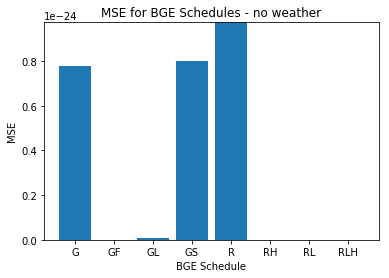

In [14]:
# Mean Squared Error across all 8 schedules (no weather data considered)
X = ['G', 'GF', 'GL', 'GS', 'R', 'RH', 'RL', 'RLH']
Y = [mse_G, mse_GF, mse_GL, mse_GS, mse_R, mse_RH, mse_RL, mse_RLH]

plt.bar(X,Y)
plt.xlabel('BGE Schedule')
plt.ylabel('MSE')
plt.title('MSE for BGE Schedules - no weather')

print('Average MSE - no weather: ' + str(sum(Y)/len(Y)))

In [15]:
# Import weather data from CSV file (source = NOAA)
weather_data = pd.read_csv('1559598.csv')
weather_data = weather_data.drop(['STATION', 'NAME', 'SNWD', 'TAVG'], 
                                 axis = 1)
weather_data = weather_data.rename(index=str, 
                                   columns={"DATE": "Date"})

# Convert date to datetime
weather_data['Date'] = pd.to_datetime(weather_data['Date'])

# Merge weather data with load data
newdata = data.merge(weather_data, on = 'Date')

In [16]:
G = newdata['Segment'] == 'Segment:G'
GF = newdata['Segment'] == 'Segment:GF'
GL = newdata['Segment'] == 'Segment:GL'
GS = newdata['Segment'] == 'Segment:GS'
R = newdata['Segment'] == 'Segment:R'
RH = newdata['Segment'] == 'Segment:RH'
RL = newdata['Segment'] == 'Segment:RL'
RLH = newdata['Segment'] == 'Segment:RLH'

In [17]:
data_2007 = newdata['Date'].dt.year == 2007
data_2008 = newdata['Date'].dt.year == 2008
data_2009 = newdata['Date'].dt.year == 2009
data_2010 = newdata['Date'].dt.year == 2010
data_2011 = newdata['Date'].dt.year == 2011
data_2012 = newdata['Date'].dt.year == 2012
data_2013 = newdata['Date'].dt.year == 2013
data_2014 = newdata['Date'].dt.year == 2014
data_2015 = newdata['Date'].dt.year == 2015
data_2016 = newdata['Date'].dt.year == 2016
data_2017 = newdata['Date'].dt.year == 2017
data_2018 = newdata['Date'].dt.year == 2018

In [18]:
train = newdata[data_2007 | data_2008 | data_2009 | data_2010 | 
        data_2011 | data_2012 | data_2013 | data_2014]
test = newdata[data_2015 | data_2016 | data_2017 | data_2018]

train['Date'] = newdata['Date'].map(dt.datetime.toordinal)
test['Date'] = newdata['Date'].map(dt.datetime.toordinal)

In [19]:
# Schedule G
train_G = train[G]
test_G = test[G]

X_train_G = train_G.drop('Segment', axis = 1)
Y_train_G = train_G.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_G = test_G.drop('Segment', axis = 1)
Y_test_G = test_G.drop(['Segment', 'Date', 'PRCP', 
                        'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model = LinearRegression()

regression_model.fit(X_train_G, Y_train_G)
# print(regression_model.score(X_train_G, Y_train_G))

Y_predict_G = regression_model.predict(X_test_G)
mse_G = mean_squared_error(Y_predict_G, Y_test_G)
print('Mean Squared Error (G - weather): ' + str(mse_G))

Mean Squared Error (G - weather): 1.7419997795277642e-14


In [20]:
# Schedule GF
train_GF = train[GF]
test_GF = test[GF]

X_train_GF = train_GF.drop('Segment', axis = 1)
Y_train_GF = train_GF.drop(['Segment', 'Date', 'PRCP', 
                            'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_GF = test_GF.drop('Segment', axis = 1)
Y_test_GF = test_GF.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_GF, Y_train_GF)
# print(regression_model.score(X_train_GF, Y_train_GF))

Y_predict_GF = regression_model.predict(X_test_GF)
mse_GF = mean_squared_error(Y_predict_GF, Y_test_GF)
print('Mean Squared Error (GF - weather): ' + str(mse_GF))

Mean Squared Error (GF - weather): 4.607876764845442e-14


In [21]:
# Schedule GL
train_GL = train[GL]
test_GL = test[GL]

X_train_GL = train_GL.drop('Segment', axis = 1)
Y_train_GL = train_GL.drop(['Segment', 'Date', 'PRCP', 
                            'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_GL = test_GL.drop('Segment', axis = 1)
Y_test_GL = test_GL.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_GL, Y_train_GL)
# print(regression_model.score(X_train_GL, Y_train_GL))

Y_predict_GL = regression_model.predict(X_test_GL)
mse_GL = mean_squared_error(Y_predict_GL, Y_test_GL)
print('Mean Squared Error (GL - weather): ' + str(mse_GL))

Mean Squared Error (GL - weather): 2.486907525856223e-13


In [22]:
# Schedule GS
train_GS = train[GS]
test_GS = test[GS]

X_train_GS = train_GS.drop('Segment', axis = 1)
Y_train_GS = train_GS.drop(['Segment', 'Date', 'PRCP', 
                            'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_GS = test_GS.drop('Segment', axis = 1)
Y_test_GS = test_GS.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_GS, Y_train_GS)
# print(regression_model.score(X_train_GS, Y_train_GS))

Y_predict_GS = regression_model.predict(X_test_GS)
mse_GS = mean_squared_error(Y_predict_GS, Y_test_GS)
print('Mean Squared Error (GS - weather): ' + str(mse_GS))

Mean Squared Error (GS - weather): 4.8304230632267745e-14


In [23]:
# Schedule R
train_R = train[R]
test_R = test[R]

X_train_R = train_R.drop('Segment', axis = 1)
Y_train_R = train_R.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_R = test_R.drop('Segment', axis = 1)
Y_test_R = test_R.drop(['Segment', 'Date', 'PRCP', 
                        'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_R, Y_train_R)
# print(regression_model.score(X_train_R, Y_train_R))

Y_predict_R = regression_model.predict(X_test_R)
mse_R = mean_squared_error(Y_predict_R, Y_test_R)
print('Mean Squared Error (R - weather): ' + str(mse_R))

Mean Squared Error (R - weather): 1.1523141399624698e-14


In [24]:
# Schedule RH
train_RH = train[RH]
test_RH = test[RH]

X_train_RH = train_RH.drop('Segment', axis = 1)
Y_train_RH = train_RH.drop(['Segment', 'Date', 'PRCP', 
                            'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_RH = test_RH.drop('Segment', axis = 1)
Y_test_RH = test_RH.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_RH, Y_train_RH)
# print(regression_model.score(X_train_RH, Y_train_RH))

Y_predict_RH = regression_model.predict(X_test_RH)
mse_RH = mean_squared_error(Y_predict_RH, Y_test_RH)
print('Mean Squared Error (RH - weather): ' + str(mse_RH))

Mean Squared Error (RH - weather): 3.8913697000382767e-14


In [25]:
# Schedule RL
train_RL = train[RL]
test_RL = test[RL]

X_train_RL = train_RL.drop('Segment', axis = 1)
Y_train_RL = train_RL.drop(['Segment', 'Date', 'PRCP', 
                            'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_RL = test_RL.drop('Segment', axis = 1)
Y_test_RL = test_RL.drop(['Segment', 'Date', 'PRCP', 
                          'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_RL, Y_train_RL)
# print(regression_model.score(X_train_RL, Y_train_RL))

Y_predict_RL = regression_model.predict(X_test_RL)
mse_RL = mean_squared_error(Y_predict_RL, Y_test_RL)
print('Mean Squared Error (RL - weather): ' + str(mse_RL))

Mean Squared Error (RL - weather): 1.8810703771788823e-14


In [26]:
# Schedule RLH
train_RLH = train[RLH]
test_RLH = test[RLH]

X_train_RLH = train_RLH.drop('Segment', axis = 1)
Y_train_RLH = train_RLH.drop(['Segment', 'Date', 'PRCP', 
                              'SNOW', 'TMAX', 'TMIN'], axis = 1)

X_test_RLH = test_RLH.drop('Segment', axis = 1)
Y_test_RLH = test_RLH.drop(['Segment', 'Date', 'PRCP', 
                            'SNOW', 'TMAX', 'TMIN'], axis = 1)

regression_model.fit(X_train_RLH, Y_train_RLH)
# print(regression_model.score(X_train_RLH, Y_train_RLH))

Y_predict_RLH = regression_model.predict(X_test_RLH)
mse_RLH = mean_squared_error(Y_predict_RLH, Y_test_RLH)
print('Mean Squared Error (RLH - weather): ' + str(math.sqrt(mse_RLH)))

Mean Squared Error (RLH - weather): 9.968164549340844e-13


Average MSE - weather considered: 1.3278138053443314e-25


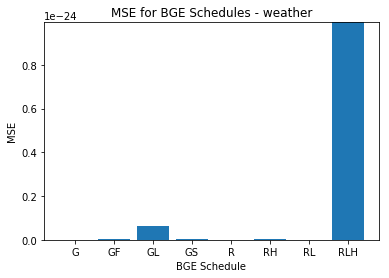

In [27]:
# Mean Squared Error across all 8 schedules (with weather data considered)
X = ['G', 'GF', 'GL', 'GS', 'R', 'RH', 'RL', 'RLH']
Y = [mse_G, mse_GF, mse_GL, mse_GS, mse_R, mse_RH, mse_RL, mse_RLH]

plt.bar(X,Y)
plt.xlabel('BGE Schedule')
plt.ylabel('MSE')
plt.title('MSE for BGE Schedules - weather')

print('Average MSE - weather considered: ' + str(sum(Y)/len(Y)))